<a href="https://colab.research.google.com/github/Martin-EliasG/Tarea-3/blob/main/Tarea3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a target="_blank" href="https://colab.research.google.com/github/AsCiDEN/Tarea-3/blob/main/Tarea3.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# **CD2201-16: Ciencia de Datos en Astronomía**

**Profesores:** Boris Cuevas, Paula Díaz, Danilo Sepúlveda, Francisco Urbina

# **Tarea 3: Ajuste de modelos**

El objetivo de esta tarea es ajustar diferentes modelos a las curvas de rotación de galaxias y, evaluando con las métricas presentadas en clases, concluír que la materia oscura es capaz de explicar la fenomenología descrita por las observaciones.

## **¿Materia oscura o solo materia luminosa?**

La curva de rotación de una galaxia es la velocidad a la cual sus estrellas o gas rota en torno a su centro como función de la distancia. Asumiendo movimiento circular y la ley de Gravitación de Newton, se puede obtener la siguiente fórmula para la curva de rotación (o ecuación de movimiento):

\begin{equation}
\tag{1}
a_c(R) = \frac{v^2(R)}{R} = \frac{G M(r\leq R)}{R^2} \implies v(R) = \sqrt{\frac{GM(r\leq R)}{R}},
\end{equation}

donde  $G$ es la constante de gravitación universal, y
\begin{equation}
\tag{2}
M(R) = M(r\leq R)= 4\pi \int_{0}^R \rho(r)r^2 dr,
\end{equation}
es decir, es la masa encerrada en una esfera de radio $R$ para una densidad de masa volumétrica $\rho(r)$.

Bajo esta ecuación, si conocemos la curva de rotación $v(R)$ de una galaxia, podemos inferir su distribución de masa y vice versa.

Una forma de obtener $M(R)$ es asumiendo que la masa de las galaxias está dominada por su componente estelar, y por ende, que existe una relación de proporcionalidad entre perfil de masa galáctico y el perfil luminoso de cada galaxia, esto ha llevado a proponer perfiles de tipo exponenciales (o de Sérsic) de la forma:

\begin{equation}
\tag{3}
M_{star}(R, M_1, R_1) = M_1 \times \left[1 - \frac{\exp(-R/R_1)(R_1 + R)}{R_1} \right]
\end{equation}

Note que este perfil depende de dos parámetros que caracterizan la masa ($M_1$) y el tamaño típico ($R_1$) de la galaxia de estudio.

**P1)**
1.   Para esta parte de la tarea será necesario trabajar con unidades, en particular, para distancias galácticas la unidad más típica es el kilo-parsec. Defina que es un kilo-parsec (kpc) y muestre su equivalencia en metros. ¿Cuántos planeta Tierra puede colocar uno al lado del otro dentro de 1 kpc de distancia?

**Respuesta:** Un kilo parsec, es:
\begin{equation}\
Parsec = \frac {UA}{tan(1^∘)}
\end{equation}

Siendo el kilo_parsec esta unidad multiplicada por 1000, también vale mencionar que una UA, es la distancia media entre la tierra y el sol.
El parsec en si mismo consiste en el cateto adyacente de un ángulo de 1^∘, con el cateto opuesto siendo la UA, los vertices son: la tierra, el sol (ángulo recto) y un punto imaginario a un parsec del sol.
parsec = 3.086E+16 [m]
kilo_parsec = 3.086E+19 [m]

2. Grafique la curva de velocidad $v(R)$ para la distribución de masa dada en la ecuación (3). Para ello considere $M_1 = 10^{10} M_{\odot}$ y $R_1 = 5 $ kpc, donde $M_\odot \approx 1.989\times 10^{30}$ kg es la masa del sol.

**Nota:** Para esta tarea puede utilizar el módulo [astropy.units](https://docs.astropy.org/en/stable/units/) para lidiar fácilmente con las unidades. Esto es completamente opcional, no se asignará puntaje extra si es que lo hacen, pero puede investigarlo si así lo desea. Tampoco se descontará en caso contrario.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
G = 6.67e-11 # constante de gravitación universal en unidades de m^3 kg^-1 s^-2
kpc_to_m = 3.086e19 # rellene con el valor de 1 kpc en metros
solar_masses_to_kg = 1.989e30 # 1 masa solar en kg

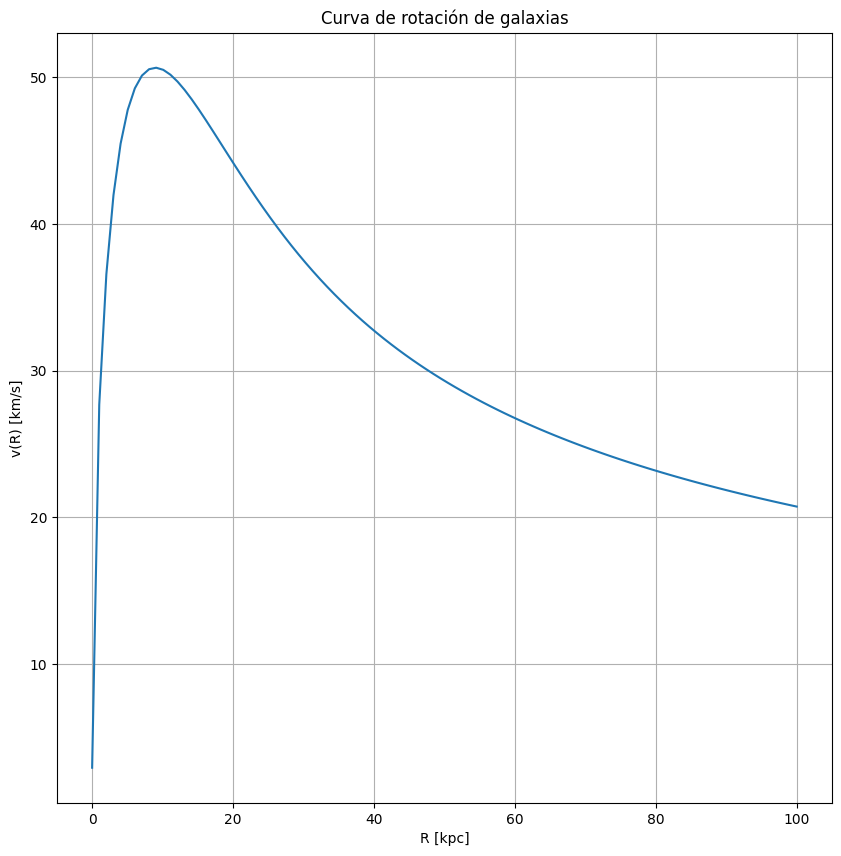

In [2]:
# Cree la función M_star(R, M_1, R_1) según la ecuación (3)

def M_star(R, M_1, R_1):
    M = M_1*solar_masses_to_kg*(1-(np.exp(-R/R_1)*(R_1+R)/(R_1)))
    return M

# Cree la función v_R_stars(R, M1, R1) utilizando la ec. (3) en (1). v(R) debe tener unidades de km/s
# Tenga cuidado con las unidades, como referencia la velocidad debería quedar entre ~10-50 km/s
def v_R_stars(R, M1, R1):
    v = np.sqrt((G*M_star(R, M1, R1))/(R*kpc_to_m))
    return v/1000


# Cree el arreglo "R", con distancias desde 0.01 a 100 kpc de forma equiespaciada con 100 elementos.
R = np.linspace(0.01, 100, 100)


# Calcule v(R) en km/s colocando la ecuación (3) en (1) y haga el gráfico correspondiente
v_r_stars = v_R_stars(R, 10**10, 5)

# Haga el gráfico :)
plt.figure(figsize=(10,10))
plt.plot(R, v_r_stars)
plt.xlabel('R [kpc]')
plt.ylabel('v(R) [km/s]')
plt.title('Curva de rotación de galaxias')
plt.grid(True)
plt.show()

#Solo seguía ordenes D:

# No olvide en cada eje indicar las unidades.


3. ¿Qué puede decir del comportamiento de $v(R)$ para $R \gg R_1$? Aproxime $M(R)$ en dicho caso e indique la forma que tendrá $v(R)$.

**Respuesta:** Al parecer a medida que los kpc crecen, la velocidad comienza a decrecer cada vez más lento, para una distancia muy grande podriamos describir su comportamiento similar al de la función 1/x, la cual tambien comienzaa decrecer lento sin llegar nunca a anularse.

\begin{equation}\
M = M_1*(1-\frac {R}{exp(R/R_!)R_1})\
\end{equation}

Esto se debe a que como R>>R_1, la suma llega a ser despreciable.

 Note que dicha curva tiene la misma forma que la [curva de rotación de los planetas en el sistema solar!](https://sites.temple.edu/profnewby/2019/05/04/solar-system-rotation-curve/)

En 1978, la astrónoma Vera Rubin descubrió que, para distancias grandes, la curva de rotación no seguía la forma predicha por los típicos perfiles de masa (como aquel que usted describió en la parte anterior).

Una forma de resolver este misterio es incorporando un segundo elemento que está aportando de forma considerable a la distribución de materia, pero que aparentemente no emite ni absorbe nada de luz, apodado como **materia oscura**.

En 1997, Julio Navarro, Carlos Frenk y Simon White publicaron [un artículo científico](https://iopscience.iop.org/article/10.1086/304888/pdf) en el cual proponían un perfil de densidad $\rho(r)$ para la materia oscura a partir de resultados de simulaciones numéricas. Este perfil de densidad permite obtener la masa encerrada en un radio $R$ de la forma:

\begin{equation}
\tag{4}
M_{dm}(R, M_0, R_0) = M_0 \times \left[\ln\left(\frac{R_0 + R}{R_0}\right)  + \frac{R_0}{R_0 + R} - 1\right]
\end{equation}

4. Añada al gráfico anterior la curva de rotación dada por perfil de la ecuación (4) considerando $M_0 = 5\times 10^{10} M_{\odot}$, y $R_0 = 20$ kpc, recuerde añadir una leyenda adecuada que permita identificar ambos perfiles.


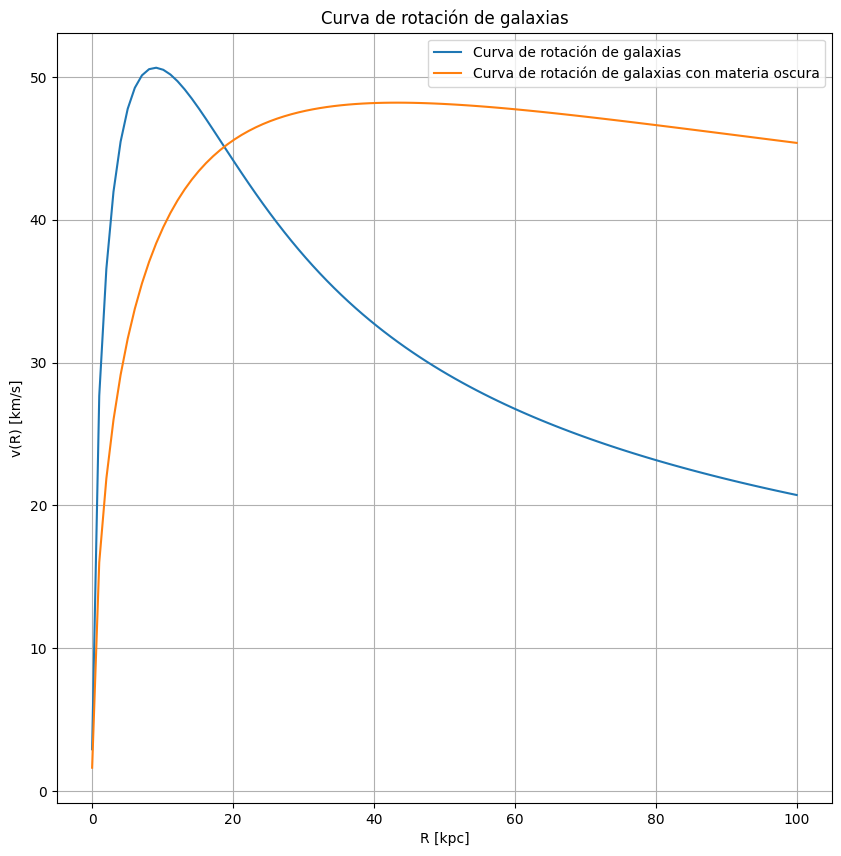

In [3]:
# Parta por definir la función M_dm(R, M0, R0) tal como se definió en la ec. (4)
def M_dm(R, M0, R0):
  m = M0*(np.log((R0+R)/R0)+R0/(R0+R)-1)
  return m*solar_masses_to_kg

# Cree la función v_R_dm(R, M0, R0) utilizando la ec. (4) en (1). v(R) debe tener unidades de km/s
def v_R_dm(R, M0, R0):
  v = np.sqrt((G*M_dm(R, M0, R0))/(R*kpc_to_m))
  return v/1000

# Utilice el mismo arreglo R de la parte anterior.
# Repita el cálculo de v(R) pero para el perfil de la ecuación (4)
# No olvide graficar ambas curvas de rotación y colocar una leyenda.

v_r_stars = v_R_stars(R, 10**10, 5)
v_r_dm = v_R_dm(R, 5*10**10, 20)

# Gráfico:
#No hay mucho que comentar, solo seguí las instrucciones
plt.figure(figsize=(10,10))
plt.plot(R, v_r_stars, label='Curva de rotación de galaxias')
plt.plot(R, v_r_dm, label='Curva de rotación de galaxias con materia oscura')
plt.xlabel('R [kpc]')
plt.ylabel('v(R) [km/s]')
plt.legend()
plt.title('Curva de rotación de galaxias')
plt.grid(True)
plt.show()

5. ¿Qué componente parece dominar a distancias cortas? ¿Cuál a distancias largas?

**Respuesta (corta):** La componente de materia luminosa, y la de materia oscura respectivamente.

Es razonable pensar que uno necesita tanto el componente deducido por la masa estelar (o luminosa) como aquella que no interactúa con la luz (materia oscura), por lo que un perfil de masa más completo involucra una suma de cada componente tal como se describe en la siguiente ecuación:

\begin{equation}
\tag{5}
M_{tot}(R, M_0, R_0, M_1, R_1 ) =  M_{dm}(R,M_0, R_0) + M_{star}(R, M_1, R_1)
\end{equation}

Ahora analizaremos la curva de rotación de la [galaxía NGC 6503](https://es.wikipedia.org/wiki/NGC_6503), para ello cargaremos el archivo **velocity_curve_NGC6503.txt**.

Las columnas del archivo tienen la siguiente información, distancia del centro (en kpc), velocidad medida (en km/s) y el error estándar en la medición (en km/s).

In [4]:
# Partiremos por "montar" el drive, esto permite que podamos leer los archivos de nuestro drive
from google.colab import drive
drive.mount('/content/drive')    # se les debe abrir una pestaña extra pidiendo permisos

Mounted at /content/drive


In [5]:
# Encuentren la ruta de su archivo, para ello puede utilizar la barra de herramientas izquierda
# lleguen a su archivo desde su "drive" y con el click derecho "copiar ruta" y luego la pegan
# como un string en la siguiente variable.
path_archivo = '/content/drive/MyDrive/Colab Notebooks/velocity_curve_NGC6503 (1).txt'
datos = np.loadtxt(path_archivo)


<ipython-input-6-a384b7df64c9>:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
  plt.errorbar(datos[:,0],datos[:,1], label = 'Barras de error, de la curva de rotación',yerr=datos[:,2], fmt='-o', ecolor='red', capsize=5, capthick=2, elinewidth=1, linestyle = '')


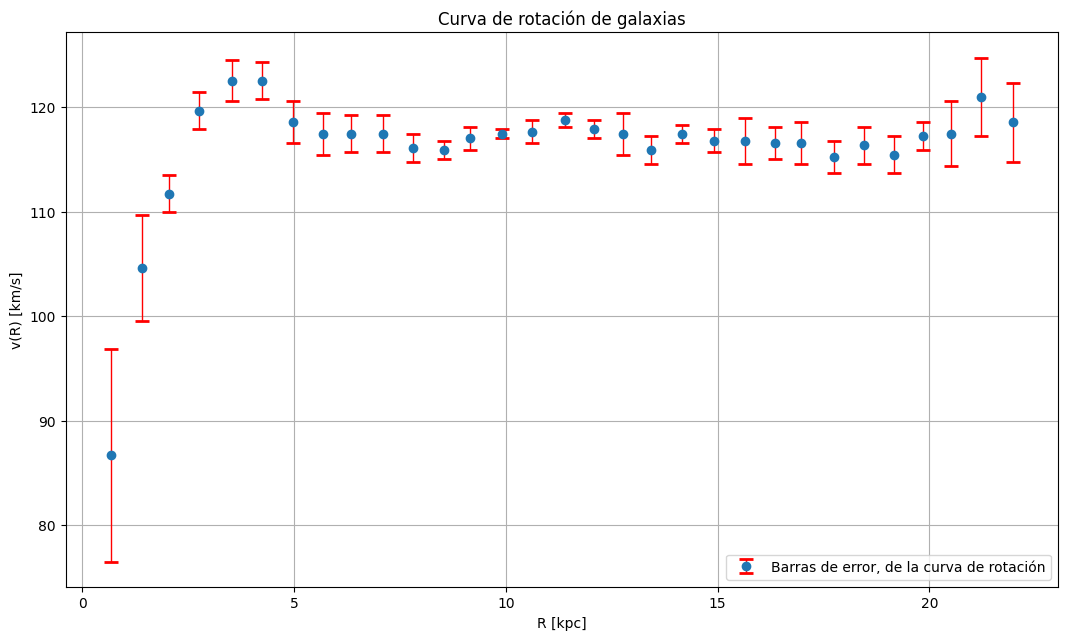

In [6]:
# Haga un gráfico de la curva de rotación incluyendo barras de error con plt.errorbar
plt.figure(figsize=(12.8,7.2))
#Barras de error, intenté que quedaran azteca como dicen los lolos
plt.errorbar(datos[:,0],datos[:,1], label = 'Barras de error, de la curva de rotación',yerr=datos[:,2], fmt='-o', ecolor='red', capsize=5, capthick=2, elinewidth=1, linestyle = '')
plt.xlabel('R [kpc]')
plt.ylabel('v(R) [km/s]')
plt.title('Curva de rotación de galaxias')
plt.grid(True)
plt.legend()
plt.show()


# No olvide añadir todo lo esencial de un gráfico y que los errores se vean de forma clara.
# Para mejor claridad cuando comparemos con modelos, haga que los puntos NO estén conectados por alguna línea.


Ajustaremos 3 modelos de curva de rotación para esta galaxia.

1. Solo componente estelar.
2. Solo materia oscura.
3. Componente estelar y materia oscura.

¿Es este un problema de ajuste de modelos lineal o no-lineal?

**Respuesta (una o dos palabras):** No lineal

In [7]:
# Importamos curve_fit que se encargará de hacer el ajuste.
from scipy.optimize import curve_fit

In [8]:
# Escriba la función v_R_tot(R, M0, R0, M1, R1) que utiliza M_tot descrito en la ecuación (5).
# Hint: puede directamente construir esta ecuación con v_R_dm y v_R_stars, le puede ahorrar errores.

def v_R_tot(R, M0, R0, M1, R1): #Función
    return v_R_dm(R, M0, R0) + v_R_stars(R, M1, R1)

# Utilice curve_fit para ajustar los 3 modelos antes mencionados. Incluya los errores.
# Para las condiciones iniciales, considere masas entre 1e10 a 1e11 masas solares, y radios entre 1 a 20 kpc.
# Rellene según corresponda, ignore las variables "pcov"

# Modelo 1: Solo componente estelar
popt_stars, pcov_stars = curve_fit(v_R_stars, datos[:,0], datos[:,1], p0=[1e10, 5])
# Modelo 2: Solo componente Materia oscura
popt_dm, pcov_dm = curve_fit(v_R_dm, datos[:,0], datos[:,1], p0=[5e10, 20])
# Modelo 3: Componente total
popt_tot, pcov_tot = curve_fit(v_R_tot, datos[:,0], datos[:,1], p0=[5e10, 20, 1e10, 5])

<ipython-input-3-ef7184bf04ea>:8: RuntimeWarning: invalid value encountered in sqrt
  v = np.sqrt((G*M_dm(R, M0, R0))/(R*kpc_to_m))
<ipython-input-2-cadd7ad143b3>:10: RuntimeWarning: invalid value encountered in sqrt
  v = np.sqrt((G*M_star(R, M1, R1))/(R*kpc_to_m))


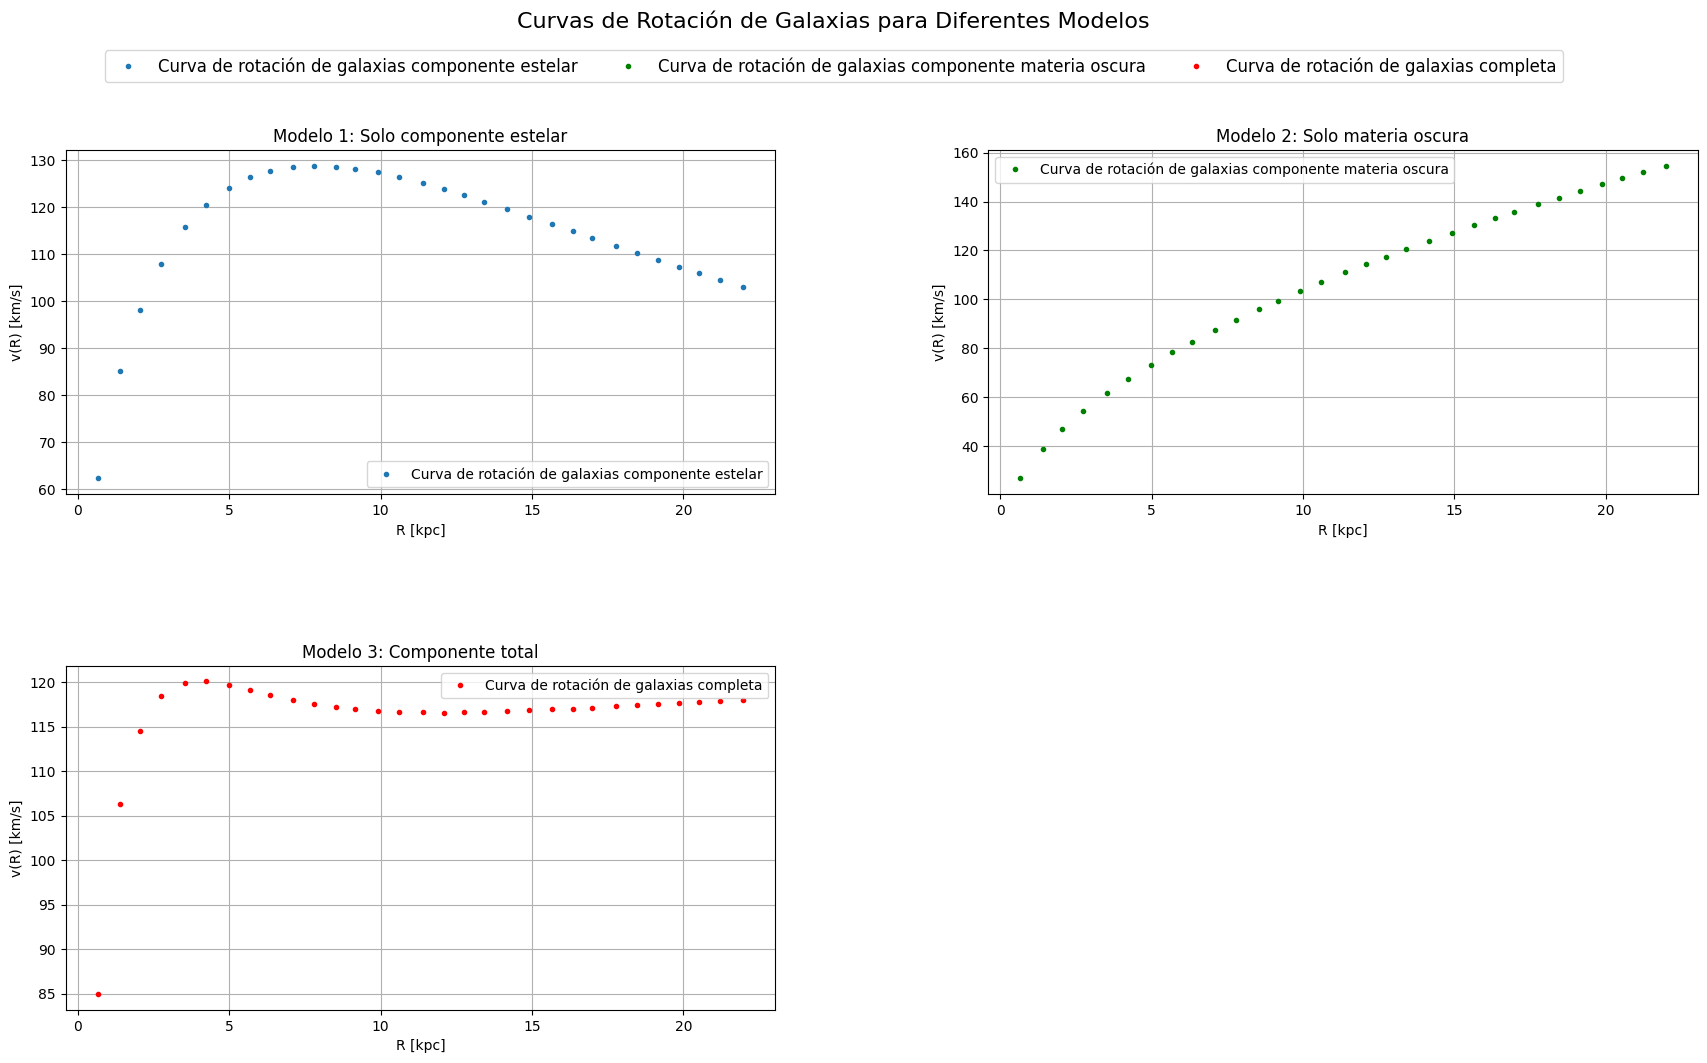

In [9]:
# En el gráfico de los datos, añada los 3 modelos con los parámetros óptimos encontrados en la parte anterior.
# No olvide añadir una leyenda adecuada.

# Figura principal
fig = plt.figure(figsize=(19.2,10.8))
g1 = fig.add_subplot(2, 2, 1)  # Primer modelo
g2 = fig.add_subplot(2, 2, 2)  # Segundo modelo
g3 = fig.add_subplot(2, 2, 3)  # Tercer modelo
fig.suptitle('Curvas de Rotación de Galaxias para Diferentes Modelos', fontsize=16)

#P rimer modelo
opstars = v_R_stars(datos[:,0], *popt_stars) #Función con valores optimizados
g1.plot(datos[:,0],opstars, label='Curva de rotación de galaxias componente estelar',
        marker = '.', linestyle = '')
g1.set_xlabel('R [kpc]')
g1.set_ylabel('v(R) [km/s]')
g1.set_title('Modelo 1: Solo componente estelar')
g1.grid(True)
g1.legend()

# Segundo modelo
opsdm = v_R_dm(datos[:,0], *popt_dm) #Función con valores optimizados
g2.plot(datos[:,0],opsdm, label='Curva de rotación de galaxias componente materia oscura',
        marker = '.', linestyle = '',color = 'g')
g2.set_xlabel('R [kpc]')
g2.set_ylabel('v(R) [km/s]')
g2.set_title('Modelo 2: Solo materia oscura')
g2.grid(True)
g2.legend()

#Tercer modelo
opstot = v_R_tot(datos[:,0], *popt_tot) #Función con valores optimizados
g3.plot(datos[:,0],opstot, label='Curva de rotación de galaxias completa',
        marker = '.', linestyle = '', color = 'r')
g3.set_xlabel('R [kpc]')
g3.set_ylabel('v(R) [km/s]')
g3.set_title('Modelo 3: Componente total')
g3.grid(True)
g3.legend()

# Ajustar la leyenda sobre los gráficos
lines = [line for ax in [g1, g2, g3] for line in ax.get_lines()]
labels = [line.get_label() for line in lines]
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=3, fontsize=12)
# Ajuste de posición de los gráficos
plt.tight_layout()
plt.subplots_adjust(left=0.1, right=0.95, wspace=0.3, hspace=0.5, top=0.85)

plt.show()


Evaluaremos cada modelo con la métrica $\chi ^2$ definida como:

$$\chi ^2 = \sum_{i=1}^N \frac{(y_i - v_R(x_i))^2}{\sigma_i^2}, $$

donde $y_i$ es el dato de la velocidad de rotación en la distancia $x_i$, cuyo error de medición es $\sigma_i$ y $v_R$ es el modelo respectivo.


In [10]:
# Para evaluar las métricas necesita primero evaluar su modelo en cada x_i
#Usé los parámetros anteriores, no me la pensé mucho, una disculpa
pred_tot = v_R_tot(datos[:,0],5*10**10, 20, 10**10, 5)
pred_dm = v_R_dm(datos[:,0],5*10**10,20)
pred_stars = v_R_stars(datos[:,0],10**10, 5)

# Defina la función chi_cuadrado(datos, sigma, pred), donde datos, sigma y pred
# son arreglos de igual largo que contienen los datos y_i, los errores sigma_i y
# la predicción de algún modelo.
# Esto se puede hacer en 1 línea con arreglos de numpy :)

def chi_cuadrado(datos, sigma, pred): #Función
    return np.sum((datos-pred)**2/sigma**2) #Tal como dijeron

# Haga un print reportando el chi-cuadrado de cada modelo. Rellene según corresponda.

print('Chi-cuadrado (dm+stars): ', chi_cuadrado(datos[:,0],datos[:,2],pred_tot)) #Chi total
print('Chi-cuadrado (dm-only): ', chi_cuadrado(datos[:,0],datos[:,2],pred_dm))   # Chi materia oscura
#como pregunta para el que lo revise ¿Se sabe a ciencia cierta que es y porqué pareciera no interactuar con luz y la materia normal?
#podría buscarlo en google pero siempre es más interesante si alguien te lo explique alguien en persona
print('Chi-cuadrado (stars-only): ', chi_cuadrado(datos[:,0],datos[:,2],pred_stars)) #Chi de las estrellas

Chi-cuadrado (dm+stars):  120534.42632871684
Chi-cuadrado (dm-only):  16270.310367210139
Chi-cuadrado (stars-only):  29102.02417157806


**Responda:**
1. ¿Qué modelo ajusta mejor los datos bajo la métrica anterior? ¿El peor?

EL mejor de todos es el que considera ambas variables, pues la varianza es mejor, el peor es el que solo cuenta con la componente de estrellas, tiene la varianza más alta.

2. ¿Qué puede concluír de los constituyentes de la galaxia NGC6503?

Se puede decir que la curva de velocidad depende más de de la materia oscura que de la materia común, aunque dependa más de la oscura que de la común, la componente de esta última no es para nada despreciable, con lo que se puede concluir que lo más adecuado para revisar esta curva es tener en cuenta ambas materias.

## **¿Cuántos parámetros utilizo?**

En el problema anterior el modelo que utilizamos tenía una motivación física, no estaba escogido "al azar". En esta parte trataremos de modelar algo del cual no tenemos una motivación física para proponer un modelo, en estos casos siempre debe primar el utilizar modelos sencillos por sobre modelos de alta complejidad o con muchos parámetros. En particular, ajustaremos polinomios de distinto grado y determinaremos el grado óptimo del modelo tal que su capacidad predictiva no se vea alterada.

Partiremos por generar los datos.

Considere la siguiente función:

$$f(x) = 5\sin(x) + 5\cos(x^2) + 3$$

Le añadiremos ruido utilizando una distribución normal $N(\mu= 0, \sigma=2)$.

In [11]:
np.random.seed(123)  # investigue que hace esta línea de código

**Responda:**
- ¿Qué hace la línea de código anterior? ¿Por qué es una buena práctica utilizar una "semilla" cuando se realizan experimentos aleatorios?

La semilla asegura los datos que se generan en los comandos generadores aleatorios, es decir, que la generación de np.random.rand() bajo esta semilla, siempre generará los mismos datos, sin importar cuantas veces la uses, a menos que se cambie la semilla.
Es una buena practica para comprobar que bajo los mismos parámetros se obtienen los mismos resultados, tal como en el metodo científico que exige que el experimento realizado sea repetible por el resto de personas que quieran realizarlo y deberían llegar a la misma conclusión.

[ 8.          8.07932966  8.15863713  8.23789675  8.31707904  8.39615076
  8.47507487  8.55381058  8.63231329  8.71053467  8.78842261  8.86592127
  8.94297106  9.01950867  9.09546707  9.17077554  9.24535967  9.31914141
  9.39203907  9.46396736  9.53483743  9.6045569   9.67302991  9.74015717
  9.80583606  9.86996061  9.93242167  9.99310694 10.05190109 10.10868587
 10.1633402  10.21574035 10.26576005 10.31327064 10.35814129 10.40023917
 10.43942963 10.47557647 10.50854216 10.5381881  10.56437492 10.58696278
 10.60581167 10.6207818  10.63173396 10.63852988 10.64103268 10.63910732
 10.63262104 10.62144388 10.60544917 10.58451411 10.55852028 10.52735429
 10.49090838 10.44908103 10.40177768 10.34891136 10.29040344 10.22618432
 10.15619423 10.08038392  9.99871549  9.91116319  9.81771416  9.71836928
  9.61314399  9.50206905  9.38519142  9.26257498  9.13430141  9.00047087
  8.86120284  8.71663679  8.56693289  8.41227268  8.2528597   8.08892001
  7.92070274  7.74848054  7.57254992  7.39323158  7

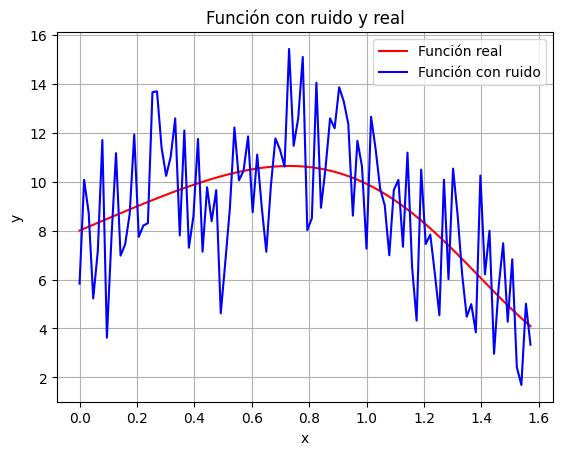

In [12]:
N_data = 100
x = np.linspace(0,np.pi/2, N_data)

#Función
def f(x):
  return 5*np.sin(x) + 5*np.cos(x**2) + 3

# Calcule un arreglo con los valores de la función f(x) con el arreglo antes definido
y_real = f(x)

# Ahora sume el "ruido" aleatorio. Para ello utilice np.random.normal()
# Revise la documentación y utilice una desviación estándar igual a 2

y_ruido = y_real + np.random.normal(0, 2, N_data) #No hay mucho que comentar, solo seguí las instrucciones

# Visualice sus datos :)
print(y_real)
print(y_ruido)

# Puede graficar la función sin ruido si así lo desea. (opcional)

plt.plot(x,y_real,color = 'r') #Sin ruido
plt.plot(x,y_ruido, color= 'b') #Con ruido
plt.title('Función con ruido y real')
plt.legend(['Función real', 'Función con ruido'])
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()



Ahora, de forma similar a lo visto en clases, haremos un ajuste con modelos polinomiales y, utilizando cross-validation, determinaremos el grado del polinomio óptimo a modo de favorecer la capacidad predictiva del modelo.

In [13]:
# Importamos los esenciales :)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [27]:
# En la siguiente variable guardaremos el error asociado a los modelos
# Exploraremos polinomios de grado 1 hasta 10, cada fila estará asociada a un modelo
# distinto y las columnas a alguna iteración de cross-validation

N_iteraciones  = 609 # puede cambiar este valor si lo desea
errores_modelos = np.zeros((10, N_iteraciones))

Ahora, repita el siguiente experimento para realizar cross-validation. Para cada iteración debe hacer lo siguiente:

- Divida el dataset en entrenamiento y testeo (use una proporción adecuada). Utilice la función train_test_split!
- Con el set de entrenamiento ajuste el modelo polinomial (desde el grado 1 al 10). Puede utilizar PolynomialFeatures para generar la matriz de diseño que necesite, use include_bias=True.  
- Evalúe su modelo en los datos de testeo y utilice las predicciones para evaluar el mean_squared_error.
- Guarde el MSE en la matriz de errores.

In [28]:
for i in range(N_iteraciones): #Probé con N 100 y el que dejé puesto, simplemente impactante
  x_test, x_train, y_test, y_train = train_test_split(x, y_ruido, test_size=0.75) #Entrenamiento y testeo
  for j in range(10):
        poly = PolynomialFeatures(degree=j+1, include_bias=True)

        poly_features = poly.fit_transform(x_train.reshape(-1, 1))     # Genera una matriz

        poly_test = poly.fit_transform(x_test.reshape(-1,1))           # Genera la matriz de testeo
        poly_reg_model = LinearRegression()
        poly_reg_model.fit(poly_features, y_train)
        y_predicted = poly_reg_model.predict(poly_test)                #Realiza las predicciones el dataset

        errores_modelos[j,i] = mean_squared_error(y_test, y_predicted) #Genera la matriz de errores


Finalmente, grafique el MSE promedio de las N iteraciones, para cada modelo y decida cuál es el grado óptimo del polinomio que debería utilizar para su modelo.

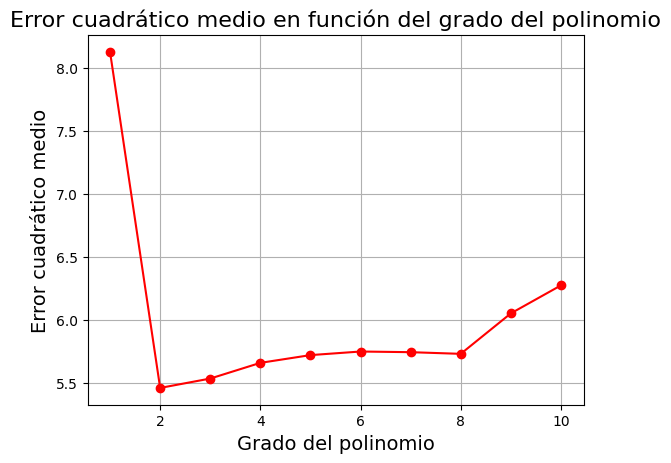

El grado óptimo del polinomio es:  2


In [29]:
# Note que para calcular el promedio pedido puede utilizar np.mean(errores_modelos, axis=1) ¿qué hace el parámetro axis=1?
# Respuesta: El parámetro axis=1 indica que se están realizando las acciones en
# Las filas de una matriz o arreglo
# Para un contexto multidimensional este parámetro selecciona la dimensión

# Añada su gráfico.
promedio_modelos =  np.mean(errores_modelos, axis=1) #Promedio MSE
plt.plot(np.arange(1,11), promedio_modelos, 'o-', color='Red')
plt.xlabel('Grado del polinomio', fontsize=14)
plt.ylabel('Error cuadrático medio', fontsize=14)
plt.title('Error cuadrático medio en función del grado del polinomio', fontsize=16)
plt.grid(True) # La pongo solo por que me gusta tenerla ahí, es más fácil leer el gráfico
plt.show()

print('El grado óptimo del polinomio es: ', np.argmin(promedio_modelos)+1) #Verificación del grado óptimo porque soy inseguro

El grado óptimo del polinomio es 2 :D